# Data Importation

In [189]:
%run -i FeatureEngineering.py

In [2]:
import sklearn
import pandas 
import xgboost
import numpy

print('Pandas version :', pandas.__version__)
print('Sklearn version :', sklearn.__version__)
print('Xgboost version :', xgboost.__version__)
print('Numpy version :', numpy.__version__)

Pandas version : 0.23.4
Sklearn version : 0.20.1
Xgboost version : 0.82
Numpy version : 1.15.4


In [94]:
Multi_Train = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Train.csv", sep = ',')
Multi_Target = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Target.csv", sep = ';')

Bin_Train = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Train1.csv", sep = ';')
target = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Target1.csv", sep = ';')

Bin_Target = pd.DataFrame()
Bin_Target['ID'] = target['ID']
Bin_Target['Target'] = [np.nan]*target.shape[0]


for i in range(target.shape[0]):
    if target['Target'][i] == 1:
        Bin_Target['Target'][i] ='+'
    else :
        Bin_Target['Target'][i] ='-'

Reg_Train = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\input_training.csv", sep = ';')
Reg_Target = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Target_Engie.csv", sep = ';')

FeatureEngineering.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor


### Multi catégorielle

In [50]:
Multi_Train[0:10].T

,0,1,2,3,4,5,6,7,8,9
ID,0,1,2,3,4,5,6,7,8,9
SHIPPING_MODE,NORMAL,NORMAL,NORMAL,RECOMMANDE,RECOMMANDE,RECOMMANDE,RECOMMANDE,RECOMMANDE,RECOMMANDE,NORMAL
SHIPPING_PRICE,0,0,0,0,0,0,0,5<10,10<20,<1
WARRANTIES_FLG,False,False,False,True,False,False,False,False,False,False
WARRANTIES_PRICE,0,0,0,5<20,0,0,0,0,0,0
CARD_PAYMENT,1,1,0,1,1,1,1,1,0,1
COUPON_PAYMENT,0,0,0,0,0,0,0,0,0,0
RSP_PAYMENT,1,0,0,0,1,0,0,0,1,0
WALLET_PAYMENT,0,0,1,0,0,0,0,0,1,0
PRICECLUB_STATUS,UNSUBSCRIBED,UNSUBSCRIBED,PLATINUM,UNSUBSCRIBED,PLATINUM,SILVER,UNSUBSCRIBED,UNSUBSCRIBED,PLATINUM,UNSUBSCRIBED


In [51]:
Multi_Train.fillna(0, axis = 1, inplace = True)

In [95]:
FeatEng = FeatureEngineering(Multi_Train[0:10000])

In [96]:
FeatEng.Missing_Values()

Missing Values :

                     Total      %
WARRANTIES_PRICE      9675  96.75
SHIPPING_PRICE        6806  68.06
BUYER_BIRTHDAY_DATE    604   6.04
SHIPPING_MODE           25   0.25
PRICECLUB_STATUS         3   0.03 



In [56]:
FeatEng.Unique()


 SHIPPING_MODE : 
 
 ['NORMAL' 'RECOMMANDE' 'EXPRESS_DELIVERY' 'SUIVI' 'SO_RECOMMANDE'
 'MONDIAL_RELAY' 'MONDIAL_RELAY_PREPAYE' 'SO_POINT_RELAIS' 0] 


 SHIPPING_PRICE : 
 
 [0 '5<10' '10<20' '<1' '1<5' '>20'] 


 WARRANTIES_FLG : 
 
 [False  True] 


 WARRANTIES_PRICE : 
 
 [0 '5<20' '<5' '20<50'] 


 PRICECLUB_STATUS : 
 
 ['UNSUBSCRIBED' 'PLATINUM' 'SILVER' 'REGULAR' 'GOLD' 0] 


 PURCHASE_COUNT : 
 
 ['<5' '50<100' '>500' '5<20' '100<500' '20<50'] 


 BUYING_DATE : 
 
 ['3/2017' '8/2017' '5/2017' '9/2017' '1/2017' '4/2017' '7/2017' '10/2017'
 '2/2017' '6/2017'] 


 SELLER_SCORE_COUNT : 
 
 ['10000<100000' '1000<10000' '100000<1000000' '100<1000' '<100'] 


 SELLER_COUNTRY : 
 
 ['FRANCE, METROPOLITAN' 'CHINA' 'HONG KONG' 'SPAIN' 'UNITED KINGDOM'
 'GERMANY' 'ANDORRA' 'SWITZERLAND' 'GIBRALTAR' 'ITALY' 'UNITED STATES'
 'NETHERLANDS' 'LUXEMBOURG' 'AUSTRIA' 'PORTUGAL' 'BULGARIA'] 


 PRODUCT_TYPE : 
 
 ['CELLPHONE_ACCESSORY' 'TOYS' 'GARDEN_TOOLS' 'MODEL' 'BRICOLAGE' 'SHOES'
 'VIDEO' 'P

In [57]:
Dict_custom = {"column" : ['PRICECLUB_STATUS'], "categ" :['UNSUBSCRIBED', 'REGULAR', 'GOLD', 'PLATINUM', 'SILVER', 0] ,
                                        "to_numeric" :  [0,1,2,3,4,5]}

FeatEng.To_numeric_custom(Dict_custom).T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
ID,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
SHIPPING_MODE,NORMAL,NORMAL,NORMAL,RECOMMANDE,RECOMMANDE,RECOMMANDE,RECOMMANDE,RECOMMANDE,RECOMMANDE,NORMAL,...,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
SHIPPING_PRICE,0,0,0,0,0,0,0,5<10,10<20,<1,...,0,1<5,0,0,0,0,0,0,0,0
WARRANTIES_FLG,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
WARRANTIES_PRICE,0,0,0,5<20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CARD_PAYMENT,1,1,0,1,1,1,1,1,0,1,...,1,0,1,1,1,0,1,1,0,1
COUPON_PAYMENT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RSP_PAYMENT,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
WALLET_PAYMENT,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
PRICECLUB_STATUS,0,0,3,0,3,4,0,0,3,0,...,3,3,0,0,1,3,4,0,0,0


In [71]:
FeatEng.To_numeric_freq(columns = 'all').T

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
ID,0.0000,1.0000,2.0000,3.0000,4.0000,5.0000,6.0000,7.0000,8.0000,9.0000,...,9990.0000,9991.0000,9992.0000,9993.0000,9994.0000,9995.0000,9996.0000,9997.0000,9998.0000,9999.0000
SHIPPING_MODE,0.6700,0.6700,0.6700,0.1827,0.1827,0.1827,0.1827,0.1827,0.1827,0.6700,...,0.1827,0.0214,0.6700,0.6700,0.0711,0.6700,0.6700,0.1827,0.6700,0.6700
SHIPPING_PRICE,0.6806,0.6806,0.6806,0.6806,0.6806,0.6806,0.6806,0.0702,0.0143,0.0639,...,0.6806,0.0702,0.1684,0.6806,0.6806,0.6806,0.6806,0.6806,0.6806,0.6806
WARRANTIES_FLG,0.9675,0.9675,0.9675,0.0325,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675,...,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675
WARRANTIES_PRICE,0.9675,0.9675,0.9675,0.0065,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675,...,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675
CARD_PAYMENT,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
COUPON_PAYMENT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
RSP_PAYMENT,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
WALLET_PAYMENT,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
PRICECLUB_STATUS,0.6171,0.6171,0.1739,0.6171,0.1739,0.0384,0.6171,0.6171,0.1739,0.6171,...,0.0384,0.1151,0.6171,0.0384,0.1151,0.1151,0.6171,0.1151,0.6171,0.1151


In [186]:
FeatEng.Unique(Data_base = False)


 SHIPPING_MODE : 
 
 ['NORMAL' 'RECOMMANDE' 'EXPRESS_DELIVERY' 'SUIVI' 'SO_RECOMMANDE'
 'MONDIAL_RELAY' 'MONDIAL_RELAY_PREPAYE' 'SO_POINT_RELAIS' nan
 'CHRONOPOST' 'PICKUP'] 


 SHIPPING_PRICE : 
 
 [nan '5<10' '10<20' '<1' '1<5' '>20'] 


 WARRANTIES_FLG : 
 
 [False  True] 


 WARRANTIES_PRICE : 
 
 [nan '5<20' '<5' '20<50' '50<100' '100<500'] 


 PRICECLUB_STATUS : 
 
 ['UNSUBSCRIBED' 'PLATINUM' 'SILVER' 'REGULAR' 'GOLD' nan] 


 PURCHASE_COUNT : 
 
 ['<5' '50<100' '>500' '5<20' '100<500' '20<50'] 


 BUYING_DATE : 
 
 ['3/2017' '8/2017' '5/2017' '9/2017' '1/2017' '4/2017' '7/2017' '10/2017'
 '2/2017' '6/2017'] 


 SELLER_SCORE_COUNT : 
 
 ['10000<100000' '1000<10000' '100000<1000000' '100<1000' '<100'] 


 SELLER_COUNTRY : 
 
 ['FRANCE, METROPOLITAN' 'CHINA' 'HONG KONG' 'SPAIN' 'UNITED KINGDOM'
 'GERMANY' 'ANDORRA' 'SWITZERLAND' 'GIBRALTAR' 'ITALY' 'UNITED STATES'
 'NETHERLANDS' 'LUXEMBOURG' 'AUSTRIA' 'PORTUGAL' 'BULGARIA' 'BELGIUM'
 'JAPAN' 'LIECHTENSTEIN' 'SLOVENIA' 'SWEDEN' 'GR

In [127]:
#FeatEng.Plot('BUYING_DATE','BUYER_BIRTHDAY_DATE')

### Regression catégorielle

In [190]:
Regression = FeatureEngineering(Reg_Train[0:100000])

In [110]:
Regression.Missing_Values()

Missing Values :

                               Total      %
Grid_voltage_min                7139  7.139
Grid_voltage                    7139  7.139
Grid_voltage_std                7139  7.139
Grid_voltage_max                7139  7.139
Generator_converter_speed_std   2016  2.016
Generator_converter_speed_max   2016  2.016
Generator_converter_speed_min   2016  2.016
Gearbox_inlet_temperature       2016  2.016
Gearbox_inlet_temperature_min   2016  2.016
Gearbox_inlet_temperature_max   2016  2.016
Gearbox_inlet_temperature_std   2016  2.016
Generator_converter_speed       2016  2.016
Nacelle_angle_c                   12  0.012
Absolute_wind_direction_c         12  0.012 



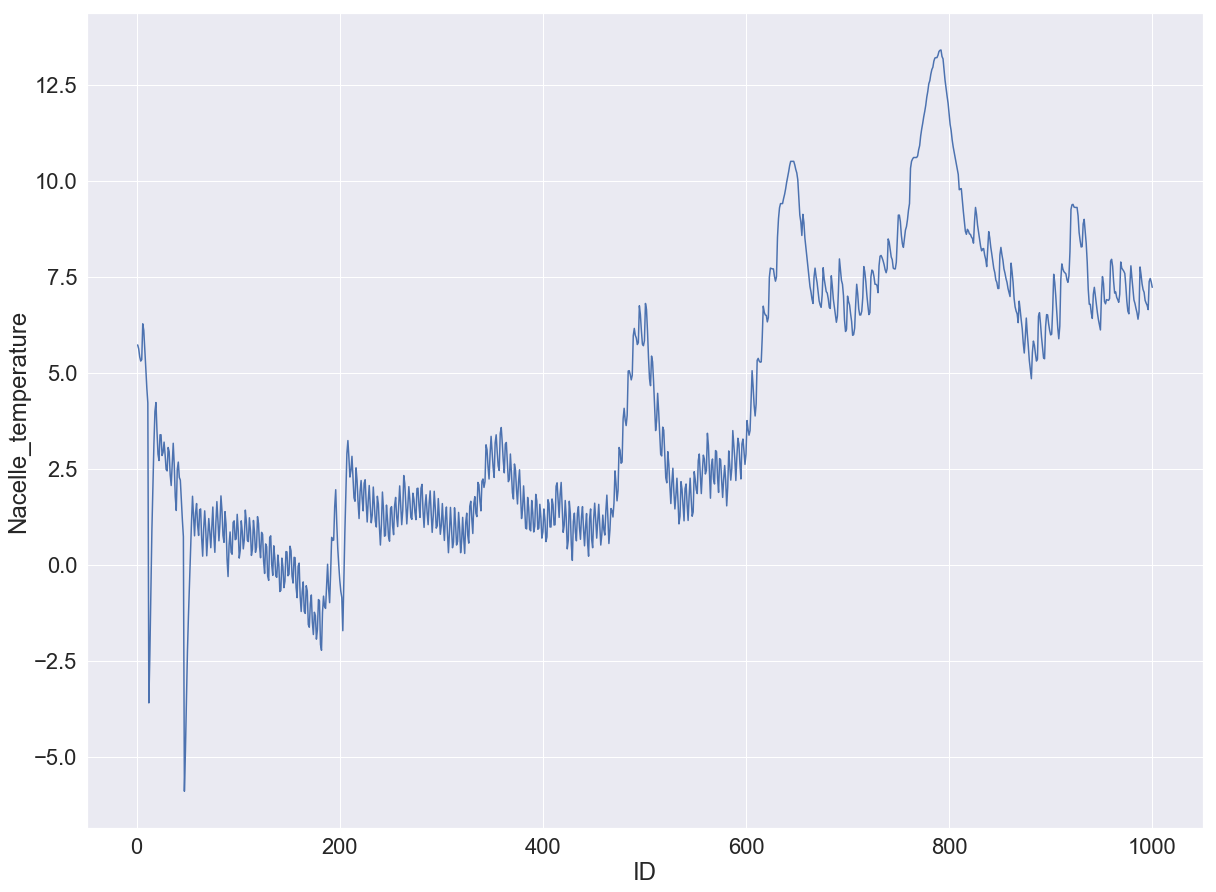

In [142]:
Regression.Plot('ID','Nacelle_temperature', n=1000)

In [175]:
A = pd.DataFrame(Multi_Train['PRICECLUB_STATUS'].value_counts()).reset_index()

In [176]:
n = A.shape[0]

T = []

for i in range(n) : 
    T.append(n-i)
    
A['counts'] = T

In [177]:
A

,index,PRICECLUB_STATUS,counts
0,UNSUBSCRIBED,61524,5
1,PLATINUM,17511,4
2,REGULAR,11574,3
3,GOLD,5609,2
4,SILVER,3725,1


In [171]:
n

107

In [184]:
A[A['index'] == 'UNSUBSCRIBED']['counts'][0]

5

In [255]:
%run -i FeatureEngineering.py

Regression = FeatureEngineering(Multi_Train[0:10000])
A = Regression.To_numeric_quant(columns = ['PURCHASE_COUNT','SELLER_SCORE_COUNT'])

In [235]:
B

,index,ITEM_PRICE
0,<10,5278
1,10<20,1891
2,20<50,1367
3,100<500,860
4,50<100,474
5,500<1000,120
6,1000<5000,10


In [236]:
Multi_Train['ITEM_PRICE'][0:50]

0           <10
1           <10
2           <10
3        50<100
4     1000<5000
5       100<500
6        50<100
7        50<100
8       100<500
9           <10
10          <10
11          <10
12        10<20
13          <10
14        20<50
15      100<500
16      100<500
17          <10
18          <10
19        20<50
20     500<1000
21       50<100
22        10<20
23          <10
24        10<20
25        10<20
26       50<100
27          <10
28        10<20
29          <10
30      100<500
31        10<20
32          <10
33       50<100
34          <10
35          <10
36        20<50
37          <10
38        10<20
39          <10
40          <10
41          <10
42       50<100
43        20<50
44        10<20
45          <10
46          <10
47          <10
48      100<500
49        10<20
Name: ITEM_PRICE, dtype: object

In [237]:
A['ITEM_PRICE'][0:50]

0     7
1     7
2     7
3     3
4     1
5     4
6     3
7     3
8     4
9     7
10    7
11    7
12    6
13    7
14    5
15    4
16    4
17    7
18    7
19    5
20    2
21    3
22    6
23    7
24    6
25    6
26    3
27    7
28    6
29    7
30    4
31    6
32    7
33    3
34    7
35    7
36    5
37    7
38    6
39    7
40    7
41    7
42    3
43    5
44    6
45    7
46    7
47    7
48    4
49    6
Name: ITEM_PRICE, dtype: int64